In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/ML_Thyroid Detection data.csv')
df.head()

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,0,0,0,0,0,1,0.002453,1,0.235849,1,0.290698,1,0.491379,1,0.275949,2
1,0.236559,0,0,0,0,0,0,1,0.007736,1,0.188679,1,0.237209,0,0.000000,0,0.000000,2
2,0.483871,1,0,0,0,0,0,1,0.001849,0,0.000000,1,0.253488,1,0.392241,1,0.303797,2
3,0.741935,0,0,0,0,0,0,1,0.000302,1,0.179245,1,0.406977,0,0.000000,0,0.000000,2
4,0.741935,0,0,0,0,0,0,1,0.001358,1,0.113208,1,0.141860,1,0.375000,1,0.177215,2


In [ ]:
df.shape

(3771, 18)

In [ ]:
df.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'goitre', 'tumor',
       'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4',
       'T4U measured', 'T4U', 'FTI measured', 'FTI', 'Classes'],
      dtype='object')

In [ ]:
df.rename(columns={'thyroid surgery': "thyroid_surgery", 'TSH measured':'TSH_measured', 'T3 measured':'T3_measured', 'TT4 measured': 'TT4_measured', 'T4U measured': 'T4U_measured'},inplace=True)

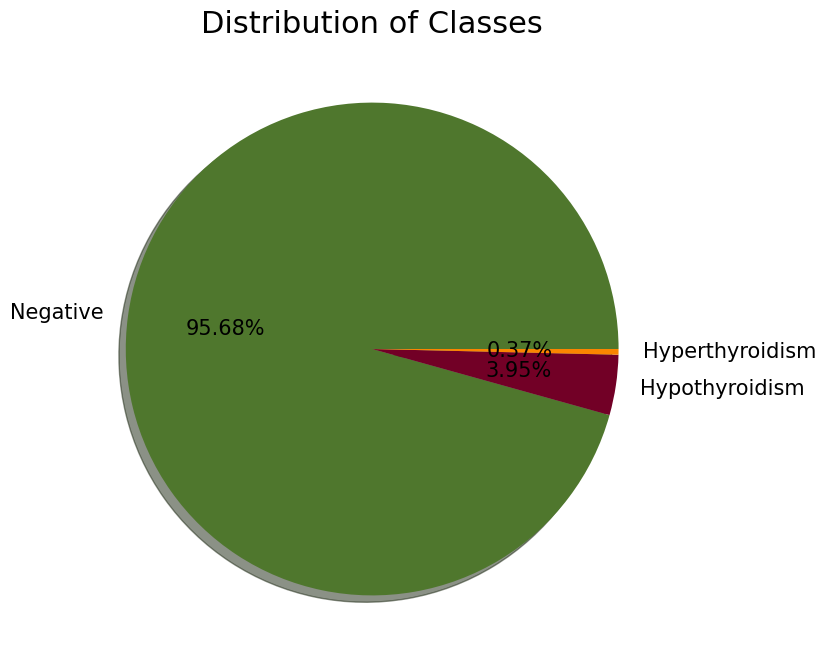

In [ ]:
plt.figure(facecolor="white",figsize=(10,8))
plt.pie(df['Classes'].value_counts(), labels=['Negative','Hypothyroidism','Hyperthyroidism'] ,colors=['#4f772d','#720026','#fb8500'], autopct='%0.2f%%',shadow=True,textprops={'fontsize': 15});
plt.title("Distribution of Classes",fontsize=22);

In [ ]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid_surgery    0
goitre             0
tumor              0
TSH_measured       0
TSH                0
T3_measured        0
T3                 0
TT4_measured       0
TT4                0
T4U_measured       0
T4U                0
FTI measured       0
FTI                0
Classes            0
dtype: int64

In [ ]:
X= df.drop(['Classes'],axis=1)
y= df.Classes

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,age,sex,sick,pregnant,thyroid_surgery,goitre,tumor,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI measured,FTI
0,0.279570,0,0,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,0.301075,0,0,0,0,0,0,1,0.028302,0,0.000000,1,0.262791,1,0.487069,1,0.253165
2,0.333333,0,0,1,0,0,0,1,0.000566,1,0.283019,1,0.234884,1,0.491379,1,0.225316
3,0.655914,0,0,0,0,0,0,1,0.002453,1,0.141509,1,0.223256,1,0.379310,1,0.275949
4,0.645161,0,0,0,0,0,0,1,0.006981,1,0.226415,1,0.179070,1,0.534483,1,0.156962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,0.312780,0,0,1,0,0,0,1,0.002130,1,0.338787,1,0.368635,1,0.711780,1,0.242141
6482,0.255114,0,0,0,0,0,0,1,0.000628,1,0.382650,1,0.367187,1,0.617983,1,0.278512
6483,0.596593,0,0,0,0,0,0,1,0.000423,1,0.326797,1,0.374445,1,0.575988,1,0.309515
6484,0.376159,0,0,0,0,0,0,1,0.000706,1,0.538546,1,0.468021,1,0.767056,1,0.287766


In [ ]:
X_train_resampled.shape, y_test.shape

((6486, 17), (755,))

In [ ]:
class_ratios = pd.Series(y_train_resampled).value_counts(normalize=True)
class_ratios

2    0.333333
1    0.333333
0    0.333333
Name: Classes, dtype: float64

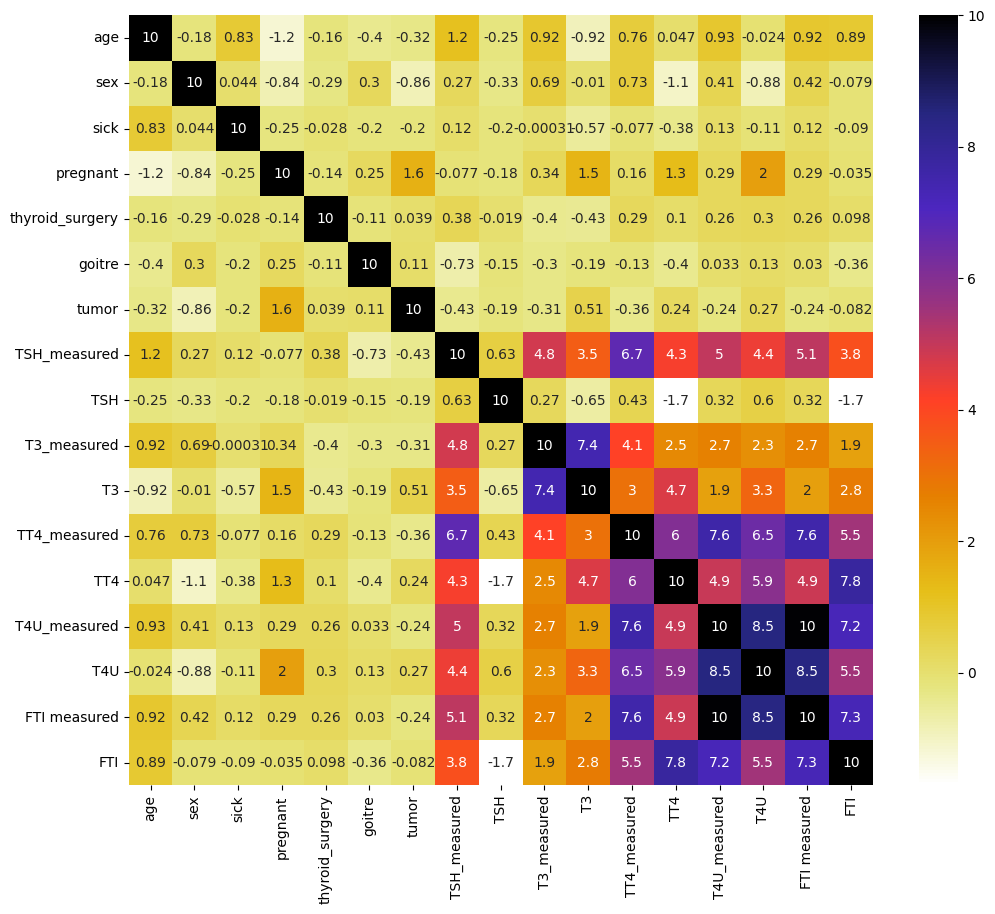

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor= X_train.corr() * 10
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(df, threshold):
  col_corr= set()
  corr_matrix= df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j])> threshold:
        colname= corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features= correlation(X_train, 0.8)
len(set(corr_features))

2

In [ ]:
corr_features

{'FTI measured', 'T4U'}

In [ ]:
X_train_resampled.drop('FTI measured', axis=1, inplace=True)
X_test.drop('FTI measured',axis=1, inplace=True)
X_val.drop('FTI measured',axis=1, inplace=True)

In [ ]:
X_train_resampled.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI'],
      dtype='object')

In [ ]:
# Libaries for Model - Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
model_parameter ={

"Logistic_Regression" :{
                        "model" : LogisticRegression(solver='liblinear'),
                        "param" : {}
                       },

"Decision_Tree" :{
                        "model" : DecisionTreeClassifier(),
                        "param" : {'criterion' : ["gini", "entropy"]}
                 },

"SVC" : {
                        "model" : SVC(),
                        "param" : {'C' :[1.0],
                                   'kernel' : ['linear', 'poly', 'rbf'],
                                   'gamma': ['scale','auto']
                                  }
       },

"KNeighborsClassifier" : {
                        "model" : KNeighborsClassifier(),
                        "param" : {'n_neighbors' : [4,5,6]}
                        },

"BernoulliNB" :  {
                    "model" : BernoulliNB(),
                    "param" : {}
                 },

"MultinomialNB" : {
                    "model" : MultinomialNB(),
                     "param" : {}
                 },

 "GaussianNB" :{
                    "model" : GaussianNB(),
                    "param" : {}
                },

"RandomForestClassifier" :{
                    "model" : RandomForestClassifier(),
                    "param" : {'criterion' : ["gini", "entropy"],
                            'n_estimators' : [85,100,110,105]
                              }
                      },

 "AdaBoostClassifier" :{
                    "model" : AdaBoostClassifier(),
                    "param" : {'n_estimators' : [10,50,100]}
                      },

"GradientBoostingClassifier" :{
                    "model" : GradientBoostingClassifier(),
                    "param" : {'n_estimators' : [10,50,100]}
                      },

"XGBClassifier" :{
                    "model" : XGBClassifier(),
                    "param" : {}
}

}

In [ ]:
from sklearn.model_selection import GridSearchCV

results = []

for model_name, model_params in model_parameter.items():

    # create the GridSearchCV object
    clf = GridSearchCV(estimator=model_params['model'],
                       param_grid=model_params['param'],
                       cv=5,
                       n_jobs=-1,
                       verbose=2)

    # fit the GridSearchCV object on the training data
    clf.fit(X_train_resampled, y_train_resampled)

    # store the results in a list
    if clf.best_score_ <=0.97:
      results.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'train_score': clf.best_score_,
        'test_score': clf.score(X_val, y_val)
    })

# convert the list of dictionaries to a dataframe
results_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
table= results_df.sort_values(by='train_score',ascending=True)
table

,model,best_params,train_score,test_score
3,AdaBoostClassifier,10,0.880363,0.835544
0,SVC,1.0,0.962380,0.916446
1,SVC,scale,0.962380,0.916446
2,SVC,poly,0.962380,0.916446


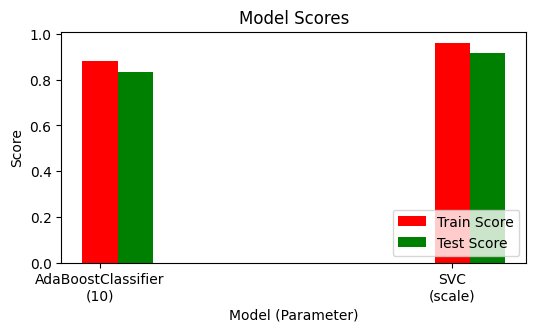

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['AdaBoostClassifier', 'SVC']
params = ['10','scale']
train_scores = [0.880363, 0.962380]
test_scores = [0.835544, 0.916446]

# create a figure with a subplot
fig, ax = plt.subplots(figsize=(6,3))

# create a numpy array for the x-axis tick labels
ticks = np.array([0, 1])

ax.bar(ticks, train_scores, width=0.1, color='red', label='Train Score')
ax.bar(ticks+0.1, test_scores, width=0.1, color='green', label='Test Score')

# set the x-axis tick labels to be the model names and parameters
ax.set_xticks(ticks)
ax.set_xticklabels([f"{model}\n({param})" for model, param in zip(models, params)])

# set the y-axis and x-axis labels
ax.set_ylabel('Score')
ax.set_xlabel('Model (Parameter)')

# add a legend
ax.legend(loc='lower right')

# set the title of the plot
plt.title('Model Scores')

# show the plot
plt.show()

In [ ]:
from sklearn.svm import SVC
clf= SVC(C=1,kernel='plo',gamma='scale')

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

SVC(C=1, kernel='poly')

In [ ]:
X_train_resampled.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI'],
      dtype='object')

In [ ]:
y_train_resampled

0       2
1       2
2       1
3       2
4       2
       ..
6481    1
6482    1
6483    1
6484    1
6485    1
Name: Classes, Length: 6486, dtype: int64

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# get the test and predicted values in a dataframe
y_test_pred = pd.DataFrame({'actual': y_test, 'predicted': clf.predict(X_test)})

# display the dataframe
y_test_pred[30:35]

,actual,predicted
1532,2,2
3501,2,2
1572,2,2
761,2,1
2623,2,2


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.91


In [ ]:
from sklearn.metrics import classification_report

# assume y_test and y_pred are the true labels and predicted labels, respectively
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.31      0.81      0.44        27
           2       0.99      0.92      0.95       726

    accuracy                           0.91       755
   macro avg       0.49      0.91      0.56       755
weighted avg       0.97      0.91      0.93       755



In [ ]:
X_test.loc[[1027]]

,age,sex,sick,pregnant,thyroid_surgery,goitre,tumor,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI
1027,0.301075,0,0,0,0,0,0,1,0.008679,1,0.150943,1,0.225581,1,0.482759,0.220253


In [ ]:
print(y_test.loc[[1027]])
print(clf.predict(X_test.loc[[1027]])[0])

1027    2
Name: Classes, dtype: int64
2


In [ ]:
X_train_resampled.loc[[340]]

,age,sex,sick,pregnant,thyroid_surgery,goitre,tumor,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI
340,0.591398,0,0,0,0,0,0,1,0.001642,1,0.179245,1,0.269767,0,0.0,0.0


In [ ]:
print(y_train_resampled.loc[[340]])
print(clf.predict(X_train_resampled.loc[[340]])[0])

340    2
Name: Classes, dtype: int64
2


In [ ]:
print(y_test.loc[[761]])
print(clf.predict(X_test.loc[[761]])[0])

761    2
Name: Classes, dtype: int64
1
